In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
n_procs = 64
prog = "testpt"
!rm -r results
!mkdir results
!./{prog} {n_procs}

thread 2 exited. time_avg=112.485284, time_max=9744308.000000, time_min=60.000000
thread 5 exited. time_avg=109.772523, time_max=5900993.000000, time_min=50.000000
thread 3 exited. time_avg=119.952266, time_max=12173884.000000, time_min=50.000000
thread 4 exited. time_avg=126.355445, time_max=9433927.000000, time_min=50.000000
thread 6 exited. time_avg=120.004587, time_max=8559324.000000, time_min=60.000000
thread 7 exited. time_avg=129.209378, time_max=14149518.000000, time_min=60.000000
thread 10 exited. time_avg=128.602109, time_max=11345109.000000, time_min=60.000000
thread 9 exited. time_avg=152.592136, time_max=15816986.000000, time_min=60.000000
thread 12 exited. time_avg=148.368143, time_max=11759316.000000, time_min=60.000000
thread 14 exited. time_avg=147.353145, time_max=11440629.000000, time_min=70.000000
thread 1 exited. time_avg=174.679843, time_max=34289448.000000, time_min=50.000000
thread 13 exited. time_avg=154.163636, time_max=15759006.000000, time_min=60.000000
thre

In [160]:
ress = []
for i in range(n_procs):
    res = np.fromfile(f"results/result{i}", dtype=np.float64, count=-1)
    ress.append(res)
allres = np.concatenate(ress)

| 64 | 4.52e+02 | 5.78e+07 | 0.00e+00 | 8.58e+04 |


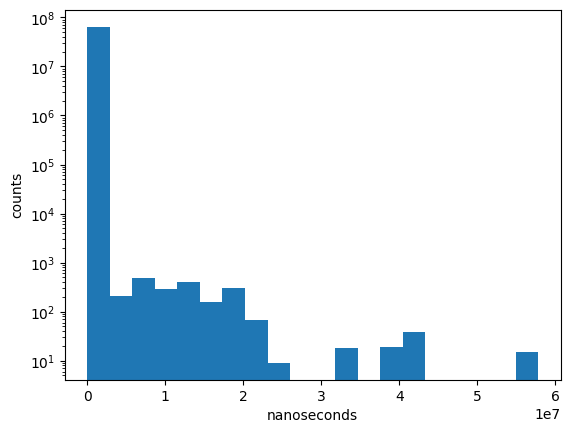

In [161]:
print(f"| {n_procs} | {allres.mean():.2e} | {allres.max():.2e} | {allres.min():.2e} | {allres.std():.2e} |")
plt.hist(allres, 20, log=True)
plt.xlabel("nanoseconds")
plt.ylabel("counts")
plt.savefig(f"figs/{prog}{n_procs}.png")
plt.show()

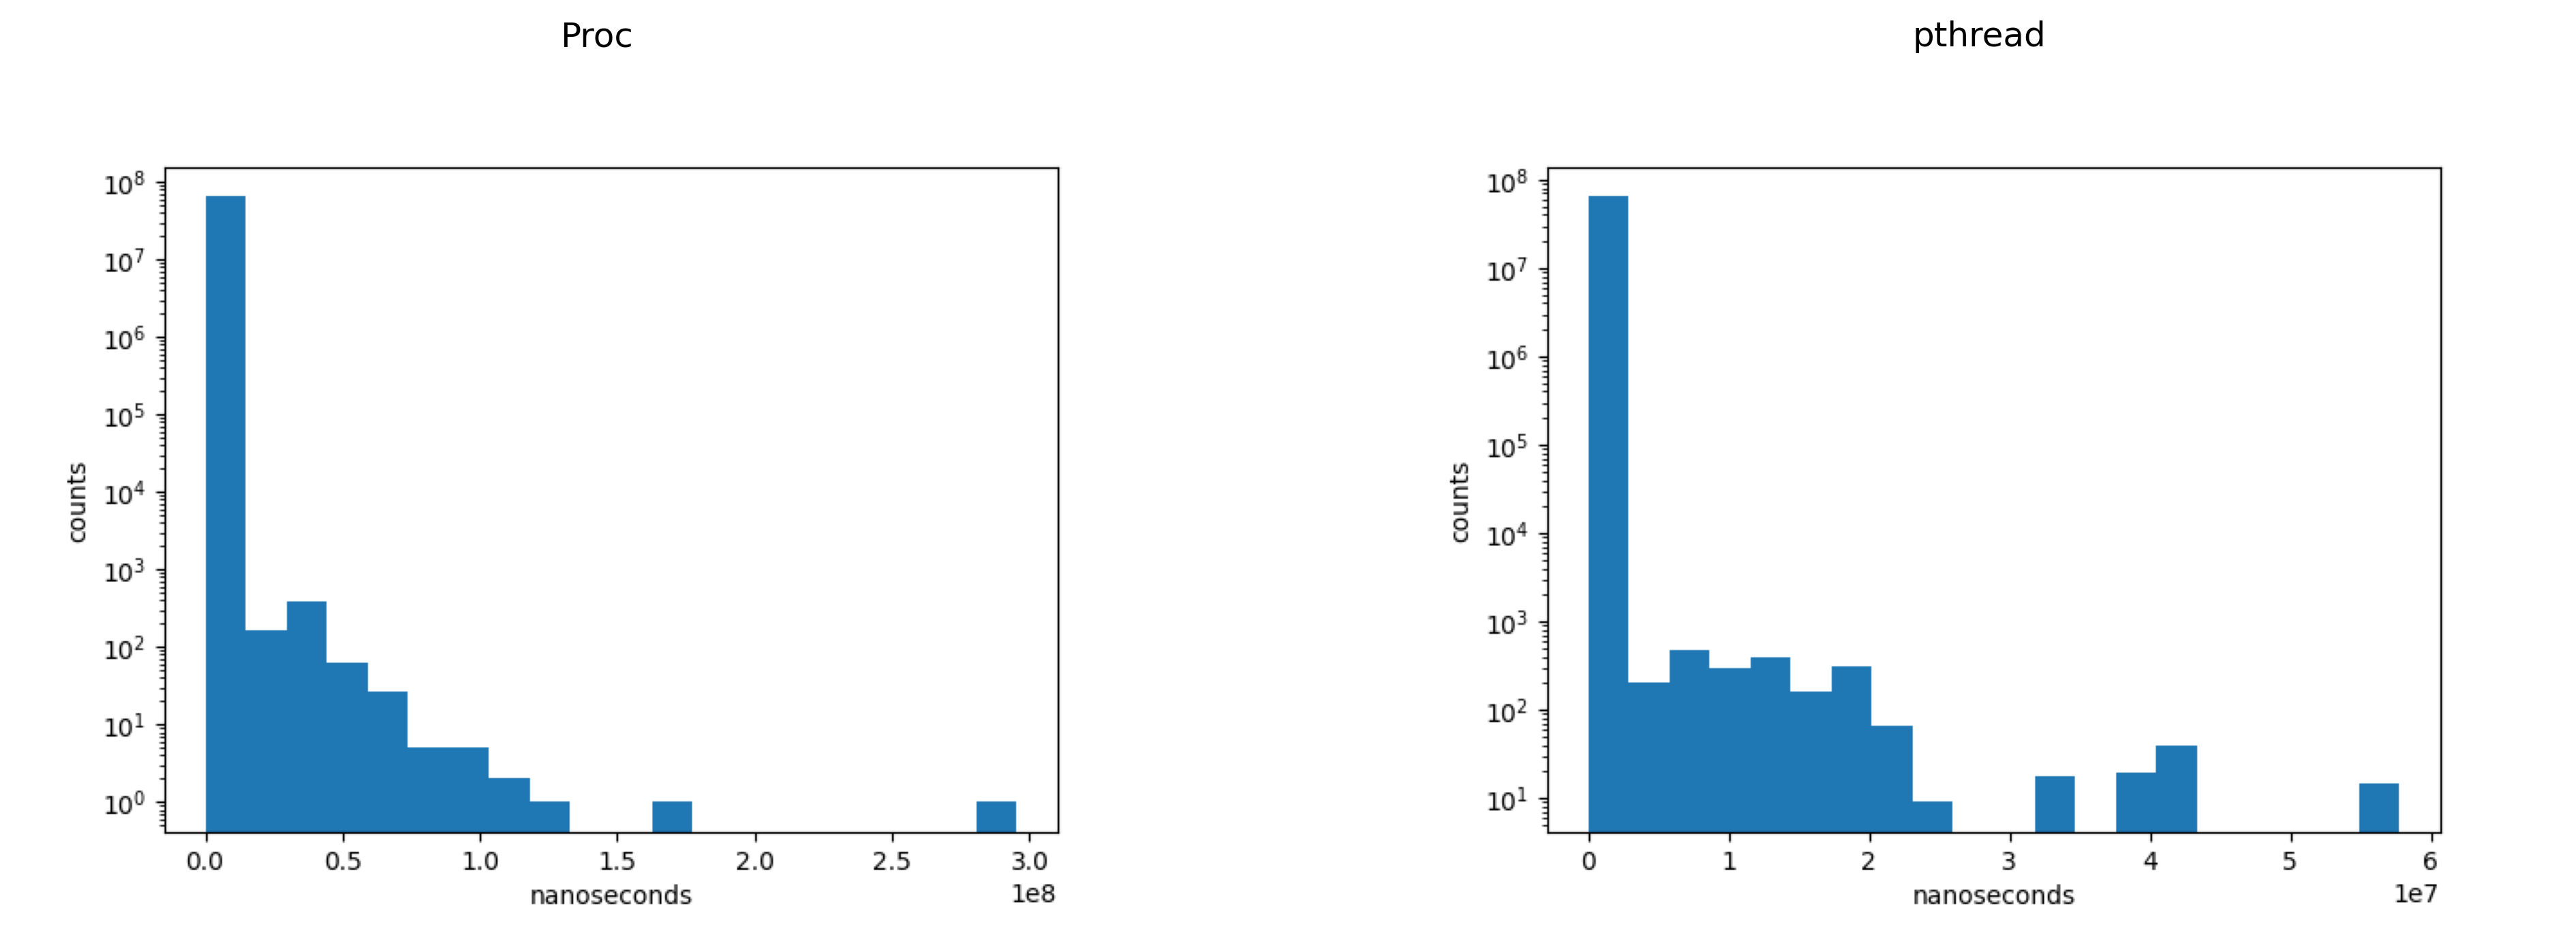

In [169]:
from PIL import Image
n_procs = 64
procimg = Image.open(f'figs/testproc{n_procs}.png')
ptimg = Image.open(f'figs/testpt{n_procs}.png')
plt.figure(dpi=300,figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title("Proc")
plt.imshow(procimg)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("pthread")
plt.imshow(ptimg)
plt.axis('off')
plt.show()